In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm

In [2]:
fig_size_1 = (15, 5)

one_week = (datetime.today()-relativedelta(days=7)).strftime('%Y-%m-%d')
one_month = (datetime.today()-relativedelta(months=1)).strftime('%Y-%m-%d')
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')
thirty_years = (datetime.today()-relativedelta(years=30)).strftime('%Y-%m-%d')
fifty_years = (datetime.today()-relativedelta(years=50)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

start_date = ten_years
end_date = today

tradin_days_in_a_year = 251

In [3]:
tickers = ['^GSPC', 'AAPL']

In [4]:
df = pd.DataFrame()

for ticker in tqdm(tickers):
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Close_One_Year'] = df_temp['Close'].shift(periods=tradin_days_in_a_year)
    df_temp['Annual_Return'] = df_temp['Close'].pct_change(periods=tradin_days_in_a_year)*100
    df_temp['Annual_Return_Mean'] = [df_temp['Annual_Return'].mean()]*len(df_temp['Annual_Return'])
    df_temp['Annual_Return_Three_Years'] = df_temp['Close'].pct_change(periods=3*tradin_days_in_a_year)*100/3
    df_temp['Annual_Return_Three_Years_Mean'] = [df_temp['Annual_Return_Three_Years'].mean()]*len(df_temp['Annual_Return_Three_Years'])

    df = df.append(df_temp)

df.groupby('Ticker').tail(1)

  0%|          | 0/2 [00:00<?, ?it/s]

,Date,Close,Ticker,Close_One_Year,Annual_Return,Annual_Return_Mean,Annual_Return_Three_Years,Annual_Return_Three_Years_Mean
2516,2021-06-11,4247.439941,^GSPC,3041.310059,39.658235,12.783574,17.549628,12.503148
2516,2021-06-11,127.349998,AAPL,84.699997,50.354195,30.166815,55.660375,29.053491


<AxesSubplot:title={'center':'Annual Return Mean'}, xlabel='Date'>

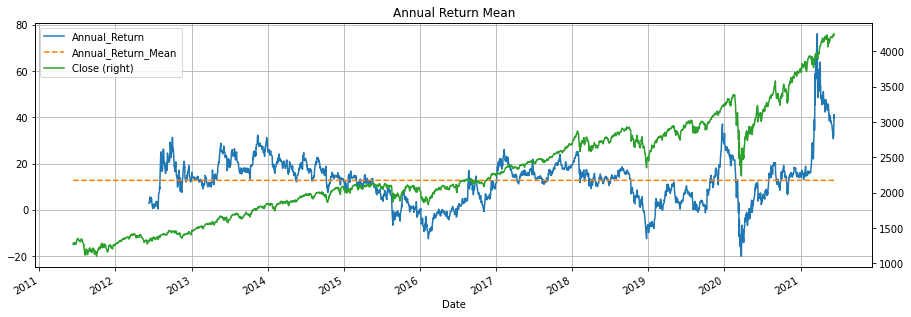

In [5]:
df[df['Ticker'] == '^GSPC'].plot(x='Date', y=['Annual_Return', 'Annual_Return_Mean', 'Close'], secondary_y=['Close'],
                                 style=['-', '--', '-'],
                                 figsize=fig_size_1, grid=True, title='Annual Return Mean')

<AxesSubplot:title={'center':'Annual Return Mean'}, xlabel='Date'>

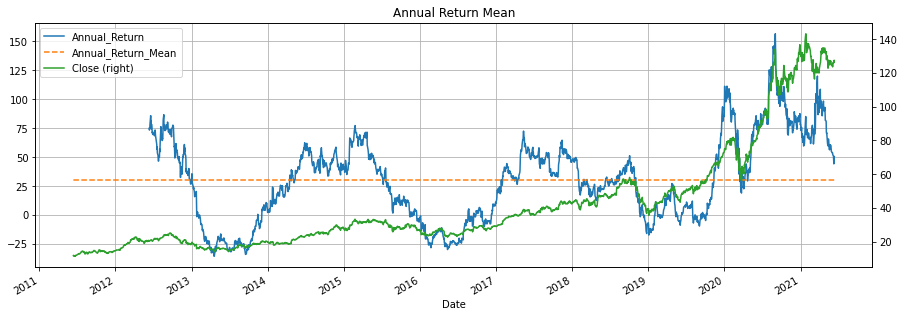

In [6]:
df[df['Ticker'] == 'AAPL'].plot(x='Date', y=['Annual_Return', 'Annual_Return_Mean', 'Close'], secondary_y=['Close'],
                                style=['-', '--', '-'],
                                figsize=fig_size_1, grid=True, title='Annual Return Mean')